<a href="https://colab.research.google.com/github/SameerR007/WonderfulWonders_TransferLearning/blob/main/WonderfulWonders_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d balabaskar/wonders-of-the-world-image-classification

 97% 421M/432M [00:03<00:00, 104MB/s]
100% 432M/432M [00:03<00:00, 136MB/s]


In [ ]:
! unzip /content/wonders-of-the-world-image-classification

In [10]:
directory="/content/Wonders of World/Wonders of World/"

In [8]:
import cv2
import os
categories=os.listdir(directory)
categories

['roman_colosseum',
 'stonehenge',
 'machu_pichu',
 'chichen_itza',
 'christ_the_reedemer',
 'eiffel_tower',
 'taj_mahal',
 'pyramids_of_giza',
 'statue_of_liberty',
 'burj_khalifa',
 'venezuela_angel_falls',
 'great_wall_of_china']

In [14]:
data_train=[]
data_valid=[]
for category in categories:
  paths=directory+category
  l=len(os.listdir(paths))
  t=int(l*.8)
  v=l-t
  i=1
  for path in os.listdir(paths):
      source=paths+"/"+path
      img=cv2.imread(source)      
      img=cv2.resize(img,(150,150))
      label=categories.index(category)
      if(i<=t):
        data_train.append([img,label])
      else:
        data_valid.append([img,label])
      i=i+1

In [15]:
data_train[0][0].shape

(150, 150, 3)

In [16]:
import random
random.shuffle(data_train)
random.shuffle(data_valid)

In [17]:
x_train=[]
y_train=[]
x_valid=[]
y_valid=[]
for a,b in data_train:
  x_train.append(a)
  y_train.append(b)
for a,b in data_valid:
  x_valid.append(a)
  y_valid.append(b)

In [18]:
y_train

[11,
 11,
 7,
 0,
 2,
 8,
 5,
 10,
 11,
 7,
 6,
 8,
 11,
 9,
 2,
 11,
 1,
 9,
 9,
 0,
 7,
 2,
 1,
 5,
 4,
 11,
 5,
 0,
 3,
 6,
 7,
 3,
 2,
 7,
 10,
 10,
 0,
 0,
 11,
 5,
 9,
 9,
 5,
 2,
 8,
 7,
 5,
 10,
 7,
 2,
 8,
 3,
 5,
 11,
 3,
 1,
 7,
 7,
 9,
 11,
 0,
 3,
 8,
 4,
 6,
 8,
 5,
 1,
 2,
 2,
 6,
 11,
 11,
 8,
 2,
 4,
 0,
 2,
 10,
 5,
 7,
 5,
 5,
 11,
 11,
 2,
 1,
 9,
 10,
 0,
 8,
 9,
 9,
 7,
 3,
 0,
 0,
 2,
 10,
 0,
 10,
 1,
 8,
 10,
 7,
 4,
 7,
 9,
 1,
 3,
 2,
 5,
 1,
 7,
 4,
 5,
 7,
 4,
 10,
 3,
 3,
 2,
 1,
 2,
 8,
 11,
 10,
 5,
 11,
 8,
 3,
 0,
 1,
 8,
 10,
 3,
 1,
 5,
 4,
 2,
 11,
 8,
 3,
 2,
 11,
 10,
 11,
 6,
 9,
 2,
 0,
 9,
 2,
 8,
 11,
 1,
 5,
 10,
 8,
 7,
 4,
 3,
 2,
 3,
 4,
 3,
 3,
 2,
 7,
 2,
 8,
 3,
 3,
 1,
 4,
 9,
 10,
 2,
 11,
 2,
 0,
 0,
 8,
 0,
 7,
 11,
 7,
 0,
 3,
 0,
 2,
 8,
 4,
 5,
 8,
 8,
 0,
 11,
 3,
 6,
 7,
 2,
 5,
 7,
 11,
 11,
 2,
 4,
 4,
 2,
 1,
 4,
 10,
 1,
 4,
 4,
 5,
 9,
 6,
 5,
 9,
 8,
 0,
 5,
 11,
 9,
 11,
 5,
 5,
 5,
 4,
 3,
 1,
 4,
 4,
 8,
 3,
 2,
 4,
 9

In [19]:
import numpy as np
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_valid=np.asarray(x_valid)
y_valid=np.asarray(y_valid)

In [20]:
x_train=x_train/255.0
x_valid=x_valid/255.0

In [21]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [47]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [48]:
conv_base.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_7 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [49]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(len(categories),activation='softmax'))

In [50]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_accuracy",
                                        mode="max", patience=7,
                                        restore_best_weights=True)
model.fit(x_train,y_train,epochs=50,validation_data=(x_valid,y_valid),callbacks=[earlystopping])

Epoch 1/50
96/96 [==============================] - 11s 102ms/step - loss: 0.7190 - accuracy: 0.7865 - val_loss: 0.4317 - val_accuracy: 0.8734
Epoch 2/50
96/96 [==============================] - 9s 95ms/step - loss: 0.1584 - accuracy: 0.9561 - val_loss: 0.2459 - val_accuracy: 0.9276
Epoch 3/50
96/96 [==============================] - 9s 94ms/step - loss: 0.0551 - accuracy: 0.9906 - val_loss: 0.2238 - val_accuracy: 0.9380
Epoch 4/50
96/96 [==============================] - 9s 95ms/step - loss: 0.0192 - accuracy: 0.9990 - val_loss: 0.1979 - val_accuracy: 0.9444
Epoch 5/50
96/96 [==============================] - 9s 94ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.1930 - val_accuracy: 0.9432
Epoch 6/50
96/96 [==============================] - 9s 95ms/step - loss: 0.0065 - accuracy: 0.9997 - val_loss: 0.1950 - val_accuracy: 0.9457
Epoch 7/50
96/96 [==============================] - 8s 83ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.1981 - val_accuracy: 0.9444
Epoch 8/50


In [64]:
model.save('model.h5')

In [59]:
test_img=cv2.imread("taj.jpeg")

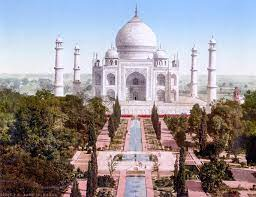

In [60]:
from google.colab.patches import cv2_imshow
cv2_imshow(test_img)

In [61]:
test_img = cv2.resize(test_img,(150,150))
test_img=test_img/255.0
test_img=np.asarray(test_img)

In [62]:
test_input = test_img.reshape(1,150,150,3)


In [63]:
pred=model.predict(test_input)
print(pred)
print(categories[np.argmax(pred)])

1/1 [==============================] - 0s 21ms/step
[[1.3200450e-04 3.7824142e-05 1.9781253e-06 5.6060515e-05 2.5106699e-03
  8.4632663e-03 9.5677161e-01 1.1120256e-05 2.3043938e-03 2.9651698e-02
  5.4690838e-05 4.7353619e-06]]
taj_mahal
